# Training logs for min move strategy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir('logs')

## LR Range Test

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


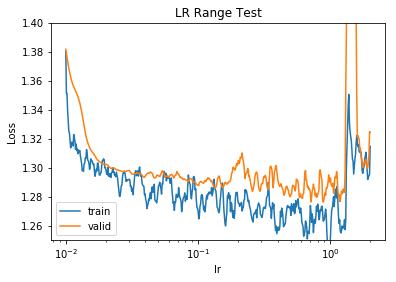

In [6]:
logs0 = np.load('20190808/range_test_b1024_d1e-06.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


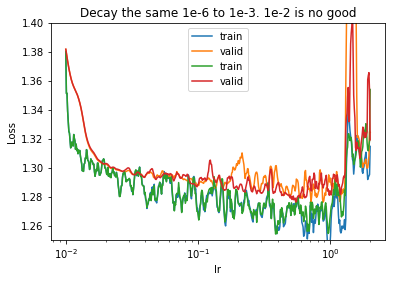

In [17]:
logs0 = np.load('20190808/range_test_b1024_d1e-06.npz')
logs1 = np.load('20190808/range_test_b1024_d0.001.npz')
print(logs0['params'])
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
t_loss1[2:-2] = np.convolve(t_loss1, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1, epochs, v_loss1)
plt.legend(['train','valid', 'train', 'valid'])
plt.title('Decay the same 1e-6 to 1e-3. 1e-2 is no good')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 2048, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


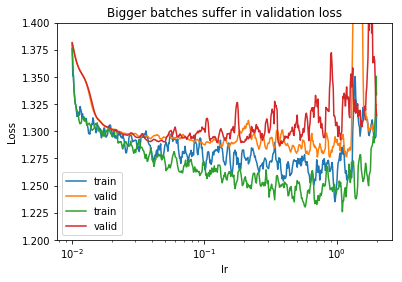

In [19]:
logs0 = np.load('20190808/range_test_b1024_d1e-06.npz')
logs1 = np.load('20190808/range_test_b2048_d1e-06.npz')
print(logs0['params'])
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
t_loss1[2:-2] = np.convolve(t_loss1, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1, epochs, v_loss1)
plt.legend(['train','valid', 'train', 'valid'])
plt.title('Bigger batches suffer in validation loss')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.2, 1.4])
plt.show()

Model can handle learning rates up to 1.0
Try overfitting on the training set. Since there are multiple "good" moves most of the time (only a minority of boards where only one move is good and all others are bad), perhaps using a validation set is not the right thing.
Rather, just overfit on the training set, and test using the eval_nn method.

{'t_tuple': (0, 100), 'v_tuple': None, 'epochs': 100, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'save_period': 50, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


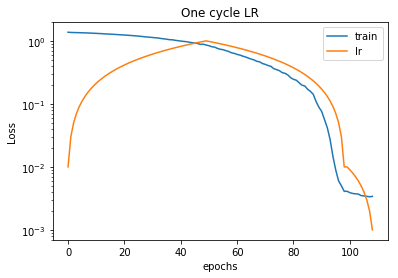

Super convergence as the lr goes back down


In [54]:
logs0 = np.load('20190808/0_100_epox100_clr1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.semilogy(epochs, t_loss0, epochs, lr0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Super convergence as the lr goes back down')

{'t_tuple': (0, 100), 'v_tuple': None, 'epochs': 100, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'save_period': 50, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


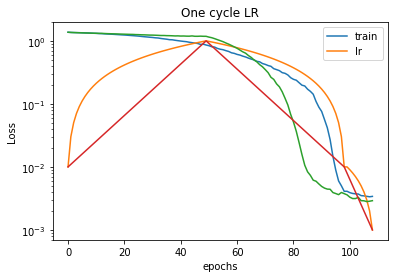

Exp cyc lr is slightly better


In [56]:
logs0 = np.load('20190808/0_100_epox100_clr1.0.npz')
logs1 = np.load('20190808/0_100_epox100_clrexp1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
lr1 = logs1['lr']
epochs = np.arange(len(t_loss0))
plt.semilogy(epochs, t_loss0, epochs, lr0, epochs, t_loss1, epochs, lr1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Exp cyc lr is slightly better')

Most rapid drop is around lr 0.04. Is too low lr endpoint slowing down learning?

{'t_tuple': (0, 100), 'v_tuple': None, 'epochs': 100, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'save_period': 50, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


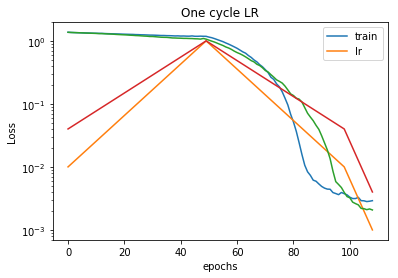

Higher lr endpoint better, but perhaps this is overfitting...


In [59]:
logs0 = np.load('20190808/0_100_epox100_clrexp1.0.npz')
logs1 = np.load('20190808/0_100_epox100_clrexp0.4_1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
lr1 = logs1['lr']
epochs = np.arange(len(t_loss0))
plt.semilogy(epochs, t_loss0, epochs, lr0, epochs, t_loss1, epochs, lr1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Higher lr endpoint better, but perhaps this is overfitting...')

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'epochs': 20, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


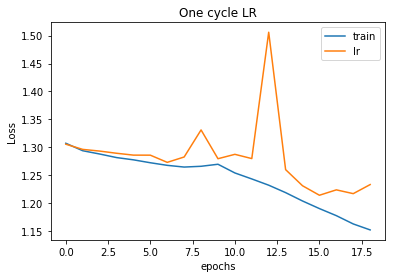

In [6]:
logs0 = np.load('20190809/20_100_epox20_clr1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss'][:20]
v_loss0 = logs0['v_loss'][:20]
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

Number of epochs is still a hyperparameter not determined by 1cycle policy. Too many epochs allows model to overfit, so I had to limit it to 20. The final lr drop at the end is not helping. The model only overfits, and val does not get better.

Non-overfitted model is stronger than Fixed play, whereas overfitted model is much weaker. Validation loss could in theory be a proxy for playing strength.

#### Use ax to optimize: 
Ax optimized hyperparameters for best model performance: stronger decay (2e-3), higher lr (start at 0.06), epox 70.

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'epochs': 69, 'lr_tuple': (0.06, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0017, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


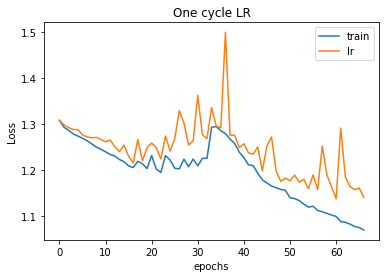

Ax parameters give lower val loss than my selection (1.15 vs 1.25)
This model has better min-dead score but weaker overall strength vs my model.


In [8]:
logs0 = np.load('20190809/20_100_epox69_clr1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Ax parameters give lower val loss than my selection (1.15 vs 1.25)')
print('This model has better min-dead score but weaker overall strength vs my model.')

## 100-200 games
Generated next 100 games using Ax optimized model (`20190809/0_100_epox69_clr1.0.npz`). This model wasn't super strong, so selfplay games had similar mean score to Fixed order. However, move preference is different (more down moves than fixed order).

{'t_tuple': (100, 200), 'v_tuple': (0, 100), 'epochs': 54, 'lr_tuple': (0.05, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.002, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


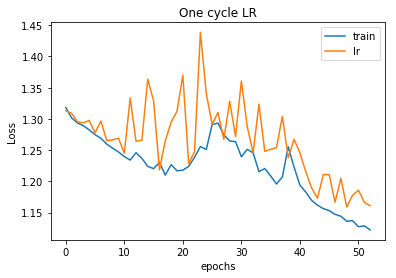

Model trained only on 100-200 also generalizes to 0-100 games


In [3]:
logs0 = np.load('20190809/100_200_epox54_clr0.05.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Model trained only on 100-200 also generalizes to 0-100 games')

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'epochs': 69, 'lr_tuple': (0.06, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0017, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


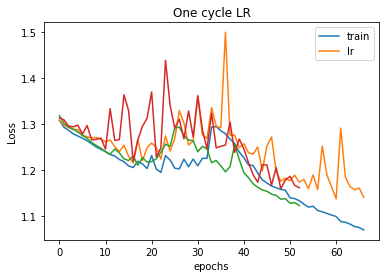

Model trained only on 100-200 also generalizes to 0-100 games


In [6]:
logs0 = np.load('20190809/20_100_epox69_clr1.0.npz')
logs1 = np.load('20190809/100_200_epox54_clr0.05.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
lr0 = logs0['lr']
epochs0 = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))
plt.plot(epochs0, t_loss0, epochs0, v_loss0, epochs1, t_loss1, epochs1, v_loss1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Model trained only on 100-200 also generalizes to 0-100 games')

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 64, 'lr_tuple': (0.003, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0008, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


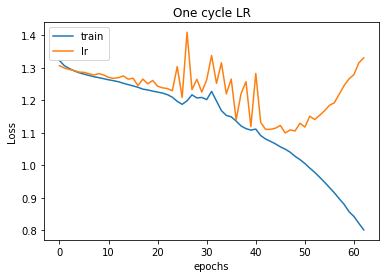

Overfitting


In [10]:
logs0 = np.load('20190809/20_200_epox64_clr0.003.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Overfitting')

## 200-300 games

{'t_tuple': (100, 300), 'v_tuple': (0, 100), 'epochs': 42, 'lr_tuple': (0.0072, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0013, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


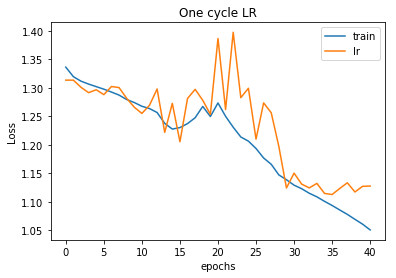

Trained on NN games still generalizes well to Fixed games


In [4]:
logs0 = np.load('20190811/100_300_epox42_clr0.0072.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Trained on NN games still generalizes well to Fixed games')

{'t_tuple': (20, 300), 'v_tuple': (0, 20), 'epochs': 38, 'lr_tuple': (0.009, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.000125, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


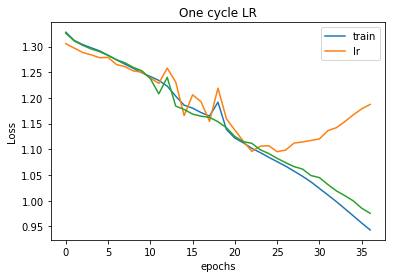

Training on all data appears to overfit the initial 20 games, although network may be stronger


In [8]:
logs0 = np.load('20190811/20_300_epox38_clr0.009.npz')
logs1 = np.load('20190811/0_300_epox38_clr0.009.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Training on all data appears to overfit the initial 20 games, although network may be stronger')

## 400 games

{'t_tuple': (100, 400), 'v_tuple': (0, 100), 'epochs': 36, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0016, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


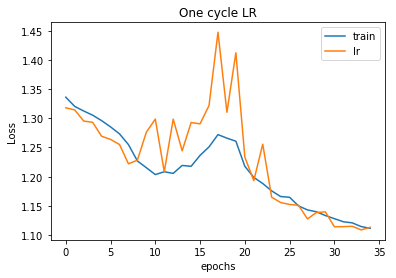

NN games generalize well to Fixed games, max lr of 1.0 may be a bit high


In [3]:
logs0 = np.load('20190812/100_400_epox36_clr0.01.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('NN games generalize well to Fixed games, max lr of 1.0 may be a bit high')

{'t_tuple': (20, 400), 'v_tuple': (0, 20), 'epochs': 22, 'lr_tuple': (0.038, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.00052, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


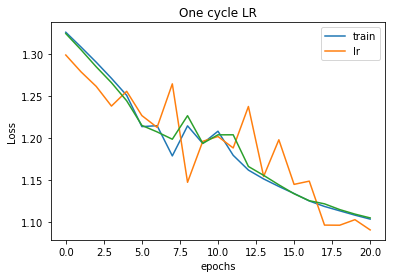

No longer overfitting the initial 20 games. Good generalizing ability.


In [5]:
logs0 = np.load('20190812/20_400_epox22_clr0.038.npz')
logs1 = np.load('20190812/0_400_epox22_clr0.038.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('No longer overfitting the initial 20 games. Good generalizing ability.')